In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [69]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

# Display the first few rows of the dataset
print(df.head())

# Inspect the structure of the dataset
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

   User_ID  Age  Gender Location     Subscription_Start_Date  \
0        1   56   Other  Central  2020-06-07 01:53:37.656934   
1        2   69   Other     West  2024-02-21 01:53:37.656980   
2        3   46  Female    North  2022-10-06 01:53:37.656995   
3        4   32  Female     East  2022-01-04 01:53:37.657006   
4        5   60  Female    North  2020-03-13 01:53:37.657017   

  Subscription_Type  Monthly_Payment Payment_Method  Monthly_Hours_Watched  \
0           Premium            19.99    Credit Card              31.513153   
1          Standard            14.99    Credit Card               4.982277   
2          Standard            14.99         PayPal               4.114953   
3          Standard            14.99    Credit Card              60.244820   
4          Standard            14.99    Credit Card               4.711855   

  Favorite_Genre Devices_Used  Average_Session_Length  Content_ID  \
0         Action           PC                1.195762        1023   
1       

In [70]:
# It seems like these missing values are likely from users who have not churned yet, which is normal.

In [71]:
# Check for obvious outliers in numerical columns
numerical_columns = ['Age', 'Monthly_Payment', 'Monthly_Hours_Watched', 'Average_Session_Length', 'Rating_Given']
df[numerical_columns].describe()


,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Rating_Given
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,44.385000,14.580000,19.071653,1.893771,3.030000
std,15.321669,3.404922,19.279140,1.868852,1.422365
min,18.000000,9.990000,0.041574,0.000486,1.000000
25%,31.750000,9.990000,5.490739,0.548918,2.000000
50%,45.000000,14.990000,13.361219,1.271808,3.000000
75%,57.000000,14.990000,26.471636,2.623575,4.000000
max,70.000000,19.990000,139.170408,11.417557,5.000000


<Axes: ylabel='Monthly_Hours_Watched'>

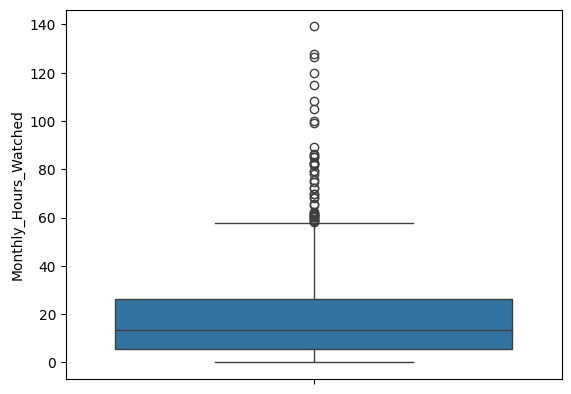

In [72]:
sns.boxplot(df['Monthly_Hours_Watched'])

<Axes: ylabel='Average_Session_Length'>

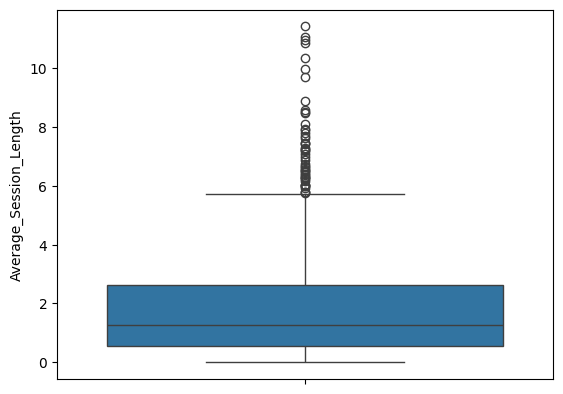

In [73]:
sns.boxplot(df['Average_Session_Length'])

<Axes: ylabel='num_watch_per_month'>

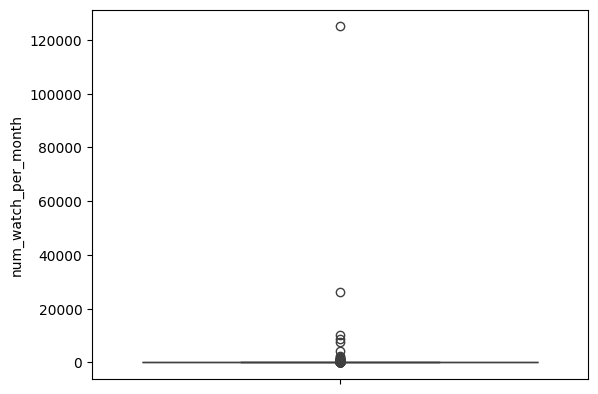

In [74]:
df['num_watch_per_month'] = df['Monthly_Hours_Watched']/ df['Average_Session_Length']
df['num_watch_per_month'].describe()
sns.boxplot(df['num_watch_per_month'])

In [75]:
# Identify significant outliers
outliers = df[df['num_watch_per_month'] > 5000]
print(f"Number of significant outliers: {len(outliers)}")

# Remove significant outliers
df_cleaned = df[df['num_watch_per_month'] <= 5000]
print(f"Shape of the cleaned dataset: {df_cleaned.shape}")

Number of significant outliers: 5
Shape of the cleaned dataset: (995, 18)


<Figure size 1200x600 with 0 Axes>

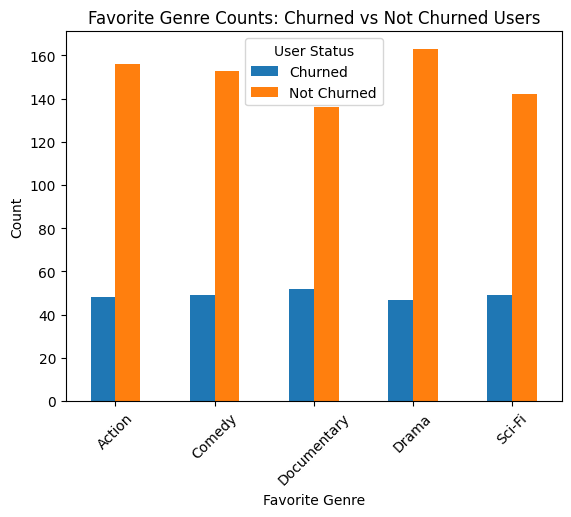

                Churned  Not Churned
Favorite_Genre                      
Action               48          156
Comedy               49          153
Documentary          52          136
Drama                47          163
Sci-Fi               49          142


In [76]:
# Separate churned and not churned users
churned_users = df_cleaned[df_cleaned['Churned'] == 1]
not_churned_users = df_cleaned[df_cleaned['Churned'] == 0]

# Count the favorite genres for churned and not churned users
churned_genre_counts = churned_users['Favorite_Genre'].value_counts()
not_churned_genre_counts = not_churned_users['Favorite_Genre'].value_counts()

# Combine the counts into a DataFrame
genre_counts = pd.DataFrame({
    'Churned': churned_genre_counts,
    'Not Churned': not_churned_genre_counts
}).fillna(0)

# Plot the relationship between favorite genre and churn status
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', stacked=False)
plt.title('Favorite Genre Counts: Churned vs Not Churned Users')
plt.xlabel('Favorite Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='User Status')
plt.show()

# Display the genre counts DataFrame
print(genre_counts)

In [77]:
# Calculate the number of churned and overall users for each favorite genre
churned_genre_counts = churned_users['Favorite_Genre'].value_counts()
overall_genre_counts = df_cleaned['Favorite_Genre'].value_counts()

# Calculate churn rate for each favorite genre
churn_rate = churned_genre_counts / overall_genre_counts

# Convert to DataFrame for better readability
churn_rate_df = churn_rate.reset_index()
churn_rate_df.columns = ['Favorite_Genre', 'Churn_Rate']

# Display the churn rate DataFrame
churn_rate_df = churn_rate_df.sort_values(by='Churn_Rate', ascending=False)
print(churn_rate_df)

  Favorite_Genre  Churn_Rate
2    Documentary    0.276596
4         Sci-Fi    0.256545
1         Comedy    0.242574
0         Action    0.235294
3          Drama    0.223810


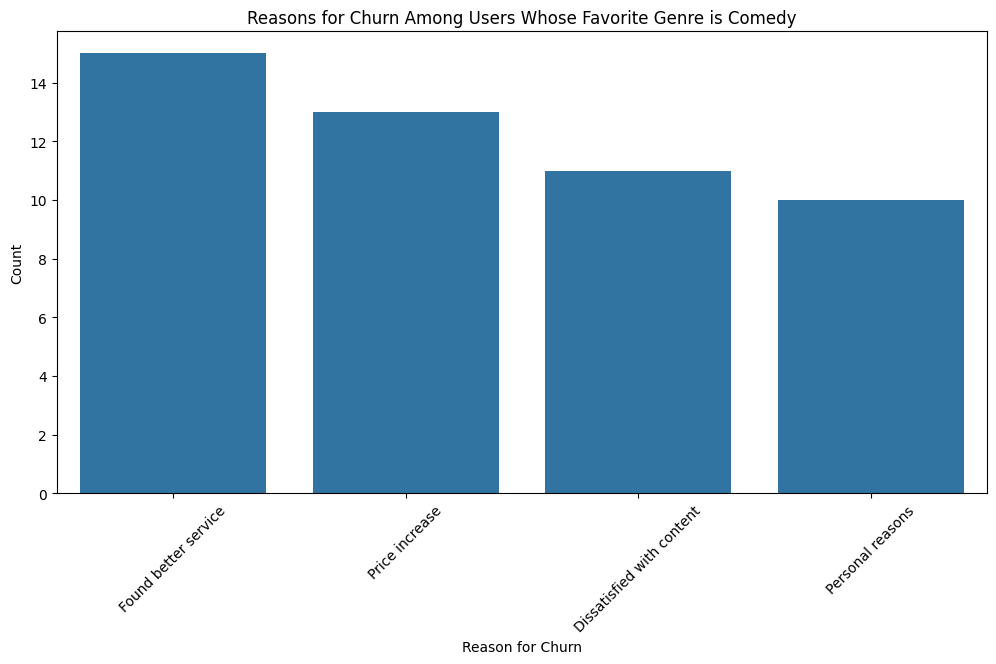

            Reason_for_Churn  Count
0       Found better service     15
1             Price increase     13
2  Dissatisfied with content     11
3           Personal reasons     10


In [78]:

# Filter the data for users who churned and whose favorite genre is Comedy
comedy_churn = df_cleaned[(df_cleaned['Churned'] == 1) & (df_cleaned['Favorite_Genre'] == 'Comedy')]

# Count the reasons for churn for these users
comedy_churn_reasons = comedy_churn['Reason_for_Churn'].value_counts().reset_index()
comedy_churn_reasons.columns = ['Reason_for_Churn', 'Count']

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(data=comedy_churn_reasons, x='Reason_for_Churn', y='Count')
plt.title('Reasons for Churn Among Users Whose Favorite Genre is Comedy')
plt.xlabel('Reason for Churn')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Display the DataFrame with reasons for churn
print(comedy_churn_reasons)


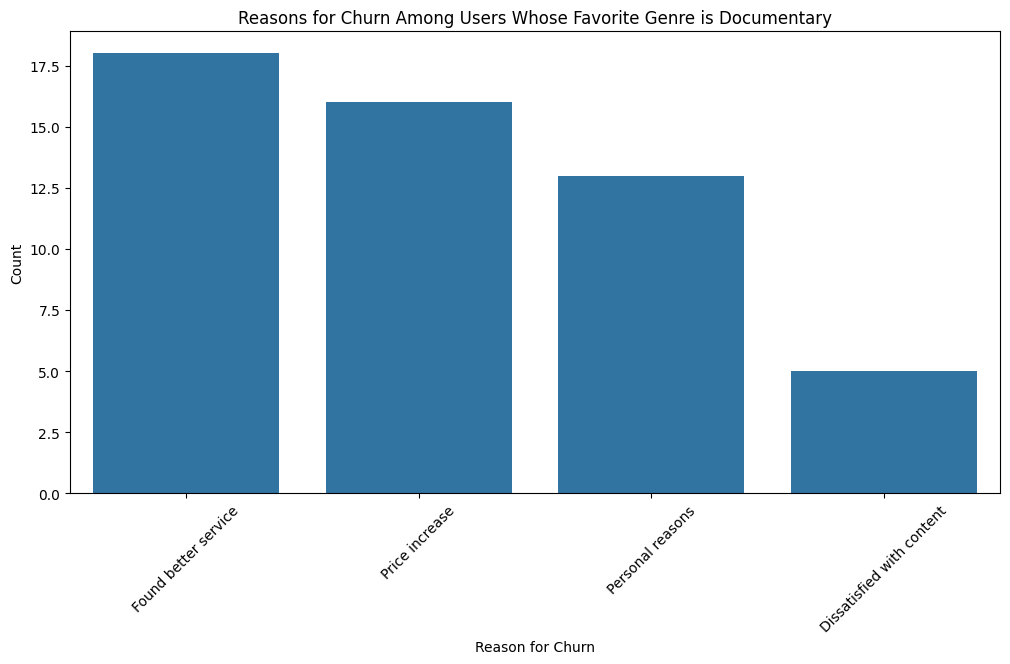

            Reason_for_Churn  Count
0       Found better service     18
1             Price increase     16
2           Personal reasons     13
3  Dissatisfied with content      5


In [79]:
# Filter the data for users who churned and whose favorite genre is Documentary
documentary_churn = df_cleaned[(df_cleaned['Churned'] == 1) & (df_cleaned['Favorite_Genre'] == 'Documentary')]

# Count the reasons for churn for these users
documentary_churn_reasons = documentary_churn['Reason_for_Churn'].value_counts().reset_index()
documentary_churn_reasons.columns = ['Reason_for_Churn', 'Count']

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(data=documentary_churn_reasons, x='Reason_for_Churn', y='Count')
plt.title('Reasons for Churn Among Users Whose Favorite Genre is Documentary')
plt.xlabel('Reason for Churn')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Display the DataFrame with reasons for churn
print(documentary_churn_reasons)

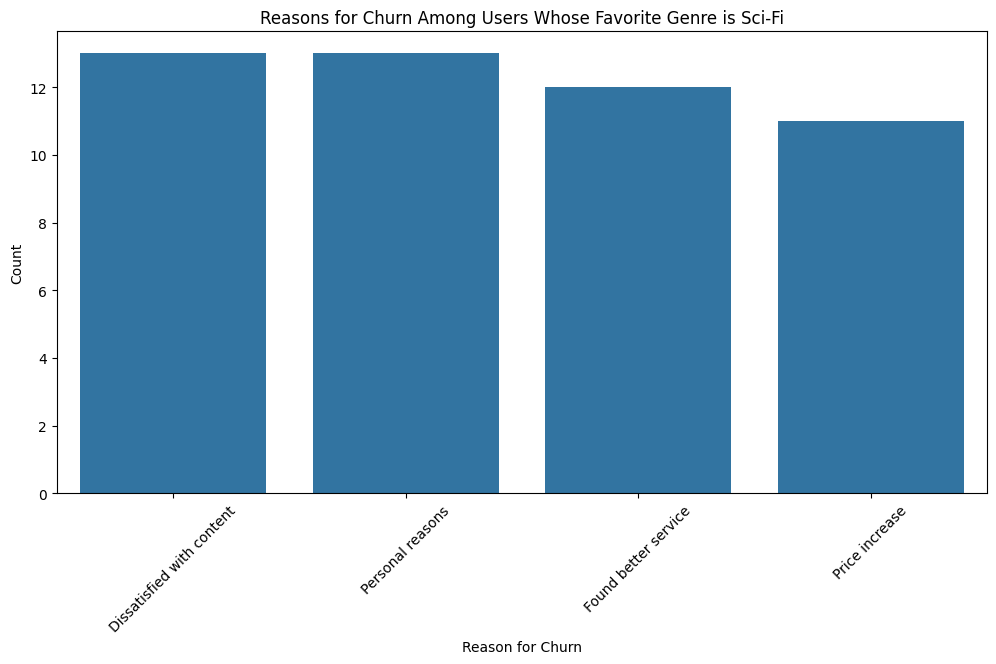

            Reason_for_Churn  Count
0  Dissatisfied with content     13
1           Personal reasons     13
2       Found better service     12
3             Price increase     11


In [84]:
# Filter the data for users who churned and whose favorite genre is Science Fiction
sci_churn = df_cleaned[(df_cleaned['Churned'] == 1) & (df_cleaned['Favorite_Genre'] == 'Sci-Fi')]

# Count the reasons for churn for these users
sci_churn_reasons = sci_churn['Reason_for_Churn'].value_counts().reset_index()
sci_churn_reasons.columns = ['Reason_for_Churn', 'Count']

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(data=sci_churn_reasons, x='Reason_for_Churn', y='Count')
plt.title('Reasons for Churn Among Users Whose Favorite Genre is Sci-Fi')
plt.xlabel('Reason for Churn')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Display the DataFrame with reasons for churn
print(sci_churn_reasons)


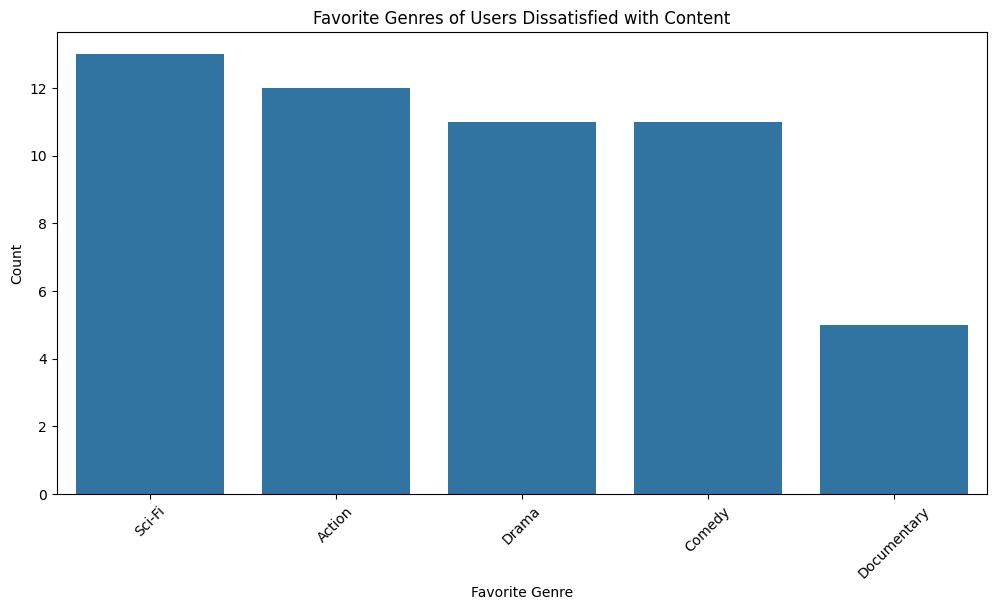

  Favorite_Genre  Count
0         Sci-Fi     13
1         Action     12
2          Drama     11
3         Comedy     11
4    Documentary      5
    Content_ID  Count
0         1027      3
1         1009      3
2         1088      2
3         1066      2
4         1094      2
5         1055      2
6         1045      2
7         1069      2
8         1075      2
9         1061      2
10        1067      1
11        1089      1
12        1076      1
13        1093      1
14        1011      1
15        1007      1
16        1018      1
17        1070      1
18        1022      1
19        1064      1
20        1080      1
21        1057      1
22        1050      1
23        1053      1
24        1052      1
25        1044      1
26        1086      1
27        1005      1
28        1034      1
29        1013      1
30        1040      1
31        1079      1
32        1087      1
33        1019      1
34        1004      1
35        1084      1
36        1096      1
37        1056      

In [80]:


# Filter the data for users who churned due to "Dissatisfied with content"
dissatisfied_churn = df_cleaned[df_cleaned['Reason_for_Churn'] == 'Dissatisfied with content']

# Count the favorite genres and content IDs for these users
dissatisfied_genre_counts = dissatisfied_churn['Favorite_Genre'].value_counts()
dissatisfied_content_counts = dissatisfied_churn['Content_ID'].value_counts()

# Convert to DataFrame for better readability
dissatisfied_genre_df = dissatisfied_genre_counts.reset_index()
dissatisfied_genre_df.columns = ['Favorite_Genre', 'Count']

dissatisfied_content_df = dissatisfied_content_counts.reset_index()
dissatisfied_content_df.columns = ['Content_ID', 'Count']

# Visualize the results
# Plot favorite genres
plt.figure(figsize=(12, 6))
sns.barplot(data=dissatisfied_genre_df, x='Favorite_Genre', y='Count')
plt.title('Favorite Genres of Users Dissatisfied with Content')
plt.xlabel('Favorite Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Display the DataFrames
print(dissatisfied_genre_df)
print(dissatisfied_content_df)


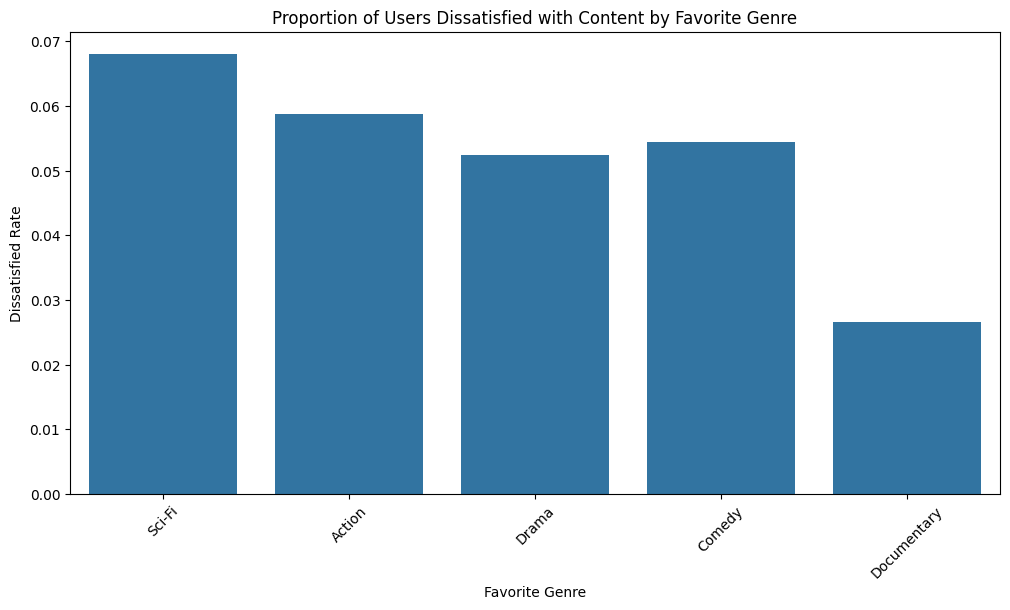

  Favorite_Genre  Dissatisfied_Count  Overall_Count  Dissatisfied_Rate
0         Sci-Fi                  13            191           0.068063
1         Action                  12            204           0.058824
2          Drama                  11            210           0.052381
3         Comedy                  11            202           0.054455
4    Documentary                   5            188           0.026596


In [81]:
# Calculate the number of users for each favorite genre
overall_genre_counts = df_cleaned['Favorite_Genre'].value_counts()

# Merge dissatisfied genre counts with overall genre counts
dissatisfied_genre_df = dissatisfied_genre_df.merge(overall_genre_counts.reset_index(), on='Favorite_Genre')
dissatisfied_genre_df.columns = ['Favorite_Genre', 'Dissatisfied_Count', 'Overall_Count']

# Calculate the proportion of dissatisfied users for each genre
dissatisfied_genre_df['Dissatisfied_Rate'] = dissatisfied_genre_df['Dissatisfied_Count'] / dissatisfied_genre_df['Overall_Count']

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(data=dissatisfied_genre_df, x='Favorite_Genre', y='Dissatisfied_Rate')
plt.title('Proportion of Users Dissatisfied with Content by Favorite Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Dissatisfied Rate')
plt.xticks(rotation=45)
plt.show()

# Display the DataFrame with dissatisfaction rates
print(dissatisfied_genre_df)


In [82]:

# Filter churned users
churned_users = df[df['Churned'] == 1]

# Analyze reasons for churn
churn_reasons = churned_users['Reason_for_Churn'].value_counts()

# Display the results
churn_reasons

Reason_for_Churn
Price increase               68
Found better service         64
Personal reasons             62
Dissatisfied with content    52
Name: count, dtype: int64

Churned Users Days of Use Statistics:
count    245.000000
mean     195.420408
std       95.674133
min       30.000000
25%      115.000000
50%      201.000000
75%      277.000000
max      364.000000
Name: Days_of_Use, dtype: float64
Not Churned Users Days of Use Statistics:
count     750.000000
mean      974.678667
std       538.402133
min        23.000000
25%       502.750000
50%       980.000000
75%      1462.750000
max      1846.000000
Name: Days_of_Use, dtype: float64


/var/folders/03/qxtr7cc92pg1c6lvx8kqq6f80000gn/T/ipykernel_1177/2381630833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Subscription_Start_Date'] = pd.to_datetime(df_cleaned['Subscription_Start_Date'])
/var/folders/03/qxtr7cc92pg1c6lvx8kqq6f80000gn/T/ipykernel_1177/2381630833.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date_of_Churn'] = pd.to_datetime(df_cleaned['Date_of_Churn'])
/var/folders/03/qxtr7cc92pg1c6lvx8kqq6f80000gn/T/ipykernel_1177/2381630833.py:10: SettingW

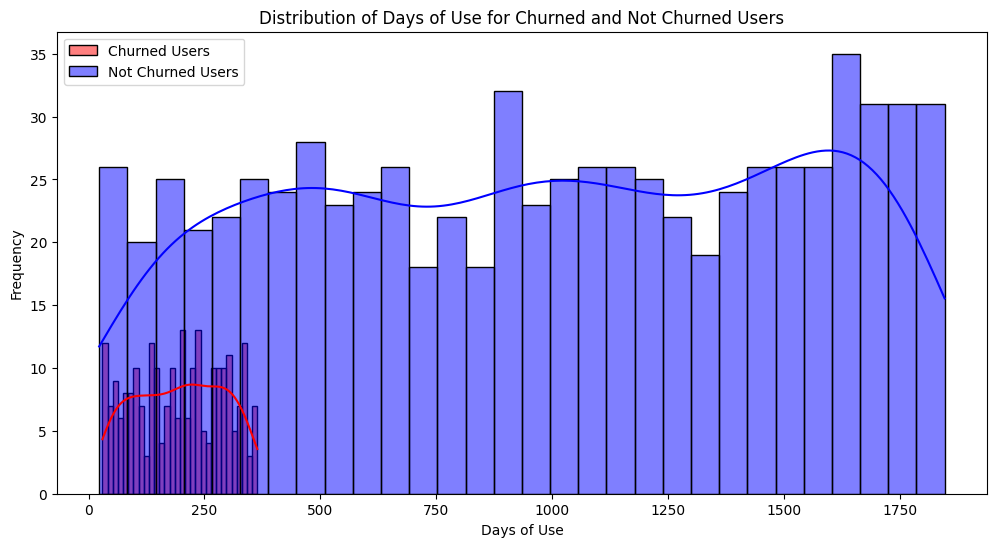

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Subscription_Start_Date and Date_of_Churn to datetime format
df_cleaned['Subscription_Start_Date'] = pd.to_datetime(df_cleaned['Subscription_Start_Date'])
df_cleaned['Date_of_Churn'] = pd.to_datetime(df_cleaned['Date_of_Churn'])

# Calculate the days of use for churned users
df_cleaned['Days_of_Use'] = (df_cleaned['Date_of_Churn'] - df_cleaned['Subscription_Start_Date']).dt.days

# For users who have not churned, calculate days of use up to the current date
current_date = pd.to_datetime('today')
df_cleaned['Days_of_Use'].fillna((current_date - df_cleaned['Subscription_Start_Date']).dt.days, inplace=True)

# Separate churned and not churned users
churned_users = df_cleaned[df_cleaned['Churned'] == 1]
not_churned_users = df_cleaned[df_cleaned['Churned'] == 0]

# Describe the days of use for churned users
days_of_use_churned_stats = churned_users['Days_of_Use'].describe()
print("Churned Users Days of Use Statistics:")
print(days_of_use_churned_stats)

# Describe the days of use for not churned users
days_of_use_not_churned_stats = not_churned_users['Days_of_Use'].describe()
print("Not Churned Users Days of Use Statistics:")
print(days_of_use_not_churned_stats)

# Plot the distribution of days of use for both churned and not churned users
plt.figure(figsize=(12, 6))
sns.histplot(churned_users['Days_of_Use'], bins=30, kde=True, color='red', label='Churned Users')
sns.histplot(not_churned_users['Days_of_Use'], bins=30, kde=True, color='blue', label='Not Churned Users')
plt.title('Distribution of Days of Use for Churned and Not Churned Users')
plt.xlabel('Days of Use')
plt.ylabel('Frequency')
plt.legend()
plt.show()
